# Описание проекта

Вы аналитик российской авиакомпании F9, которая выполняет внутренние пассажирские перевозки. Для развития компании важно понять предпочтения пользователей, покупающих билеты на разные направления.
Вам предстоит изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие фестивали.

# Описание данных

Таблица `airports` — информация об аэропортах:
* *airport_code* — трёхбуквенный код аэропорта;
* *airport_name* — название аэропорта;
* *city* — город;
* *timezone* — временная зона.


Таблица `aircrafts` — информация о самолётах:
* *aircraft_code* — код модели самолёта;
* *model* — модель самолёта;
* *range* — количество самолётов.


Таблица `tickets` — информация о билетах:
* *ticket_no* — уникальный номер билета;
* *passenger_id* — персональный идентификатор пассажира;
* *passenger_name* — имя и фамилия пассажира.


Таблица `flights` — информация о рейсах:
* *flight_id* — уникальный идентификатор рейса;
* *departure_airport* — аэропорт вылета;
* *departure_time* — дата и время вылета;
* *arrival_airport* — аэропорт прилёта;
* *arrival_time* — дата и время прилёта;
* *aircraft_code* – id самолёта.


Таблица `ticket_flights` — стыковая таблица «рейсы-билеты»:
* *ticket_no* — номер билета;
* *flight_id* — идентификатор рейса.


Таблица `festivals` — информация о фестивалях:
* *festival_id* — уникальный номер фестиваля;
* *festival_date* — дата проведения фестиваля;
* *festival_city* — город проведения фестиваля;
* *festival_name* — название фестиваля.

Таблица `festivals` была собрана в ходе парсинга с сайта. Далее был проведен исследовательский анализ при помощи SQL. В ходе анализа был сделан вывод, что во время фестивалей спрос на авиабилеты практически не меняется. Также были получены файлы, в которых содержатся результаты из первого и третьего запросов, а именно:

* таблица с информацией из первого запроса:
    * *model* — модели самолета;
    * *flights_amount* — количество рейсов для каждой модели самолетов *model* в сентябре 2018 года.

* таблица с информацией из третьего запроса:
    * *city* — городах;
    * *average_flights* — среднем количестве рейсов, прибывающих в город *city* за день в августе 2018 года.


Для этих двух наборов данных нужно:
* импортировать файлы;
* изучить данные в них;
* проверить типы данных на корректность;
* выбрать топ-10 городов по количеству рейсов;
* построить графики: модели самолетов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;
* сделать выводы по каждому из графиков, пояснить результат.

## Изучение общей информации

Импортируем необходимые библиотеки.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Прочитаем данные из запросов и назовем их `q_1` и `q_3`.

In [2]:
q_1 = pd.read_csv('/datasets/query_1.csv')
q_3 = pd.read_csv('/datasets/query_3.csv')

Напишем фукнцию *def* для вывода определенной информации таблицы.

In [3]:
def inf(data: 'DataFrame'):
    print()
    print('Описание данных таблицы')
    print(data.info())
    print('====================================================================')
    print('Процент пропусков в таблице')
    print(data.isna().mean())
    print('====================================================================')
    print('Проверка на дубликаты')
    print(data.duplicated().sum())
    print('====================================================================')
    print('Основные статистические данные')
    print(data.describe())
    print('====================================================================')
    print('Визуальный осмотр данных таблицы')
    display(data.sample(5))

In [4]:
inf(q_1)


Описание данных таблицы
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes
None
Процент пропусков в таблице
model             0.0
flights_amount    0.0
dtype: float64
Проверка на дубликаты
0
Основные статистические данные
       flights_amount
count        8.000000
mean      2035.625000
std       1965.203947
min        300.000000
25%        605.250000
50%        795.000000
75%       4250.250000
max       4557.000000
Визуальный осмотр данных таблицы


,model,flights_amount
2,Boeing 737-300,630
3,Boeing 767-300,600
7,Sukhoi SuperJet-100,4185
6,Cessna 208 Caravan,4557
4,Boeing 777-300,300


Никаких проблем нет. Таблица готова к анализу данных.

Выведем информацию о таблице `q_3`.

In [5]:
inf(q_3)


Описание данных таблицы
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB
None
Процент пропусков в таблице
city               0.0
average_flights    0.0
dtype: float64
Проверка на дубликаты
0
Основные статистические данные
       average_flights
count       101.000000
mean          5.494189
std          13.119790
min           1.000000
25%           2.000000
50%           3.000000
75%           5.870968
max         129.774194
Визуальный осмотр данных таблицы


,city,average_flights
87,Усть-Илимск,2.870968
2,Анапа,2.161290
81,Тюмень,6.967742
93,Чебоксары,5.000000
98,Южно-Сахалинск,4.290323


Тут надо изменить тип данных в столбце *average_flights* c *float64* на *int64*. Сделаем это округлив значения к большему.

In [7]:
q_3['average_flights'] = q_3['average_flights'].astype('float16')

In [13]:
q_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float16
dtypes: float16(1), object(1)
memory usage: 1.1+ KB


Вторая таблица готова к анализу.

## Анализ данных

### Топ-10 городов по количеству рейсов

Выберем топ-10 городов по среднему количеству рейсов. Отсортируем значения в таблице по убыванию значений в столбце *average_flights* и создадим таблицу `q_3_top10`, куда будут входить топ-10 городов по количеству рейсов.

In [9]:
q_3_top10 = q_3.sort_values(by = 'average_flights', ascending = False).head(10).reset_index(drop = True)
q_3_top10

,city,average_flights
0,Москва,129.750000
1,Санкт-Петербург,31.156250
2,Новосибирск,17.328125
3,Красноярск,11.578125
4,Екатеринбург,11.320312
5,Ростов-на-Дону,10.195312
6,Пермь,10.132812
7,Брянск,10.000000
8,Сочи,9.609375
9,Ульяновск,9.578125


Результат довольно очевидный - Москва на первом месте. Причем отрыв довольно сильный даже относительно второго места, на котором находится Санкт-Петербург.

### Визуализация данных

#### Модель самолета - Количество рейсов

Построим график, где будет показано сколько определенная модель самолета налетала рейсов за данный период. Отсортируем количество рейсов по убыванию.

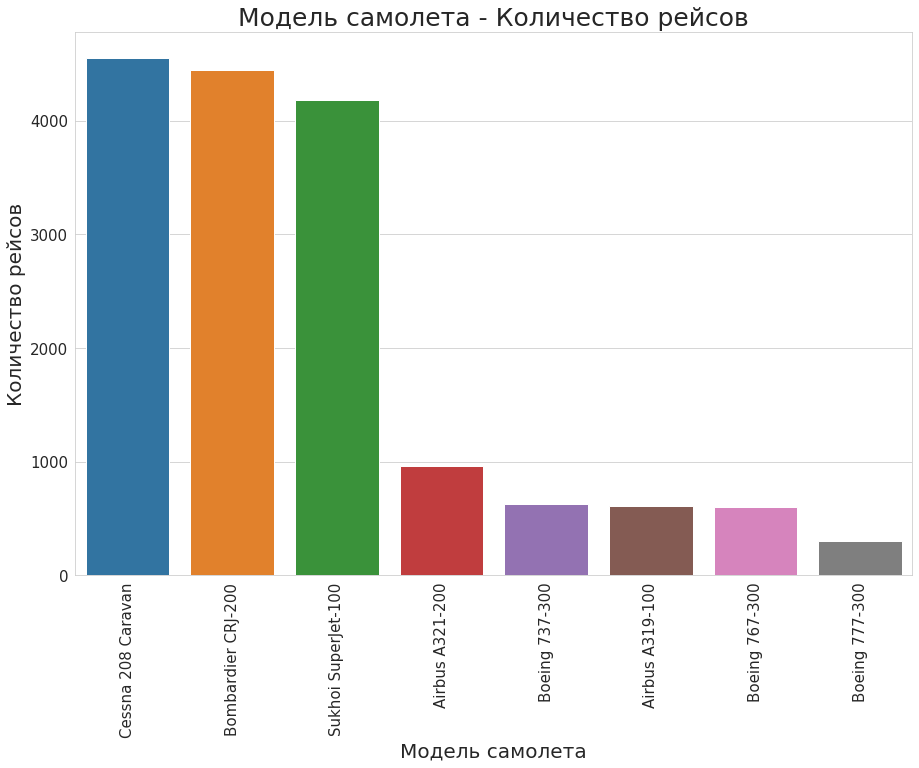

In [10]:
sns.set_style('whitegrid')
plt.figure(figsize = (15,10))

plt.title('Модель самолета - Количество рейсов', fontsize = 25)

sns.barplot(x = 'model', y = 'flights_amount', data = q_1.sort_values(by = 'flights_amount', ascending = False))

plt.xlabel('Модель самолета', fontsize = 20)
plt.ylabel('Количество рейсов', fontsize = 20)

plt.xticks(rotation='vertical', fontsize = 15)
plt.yticks(rotation='horizontal', fontsize = 15)

plt.show()

После некоторого изучения этих моделей можно сказать, что первая тройка моделей отличается малыми габаритами по сравнению с другими самолетами. Также эти модели используются в основном для перелета на малые расстояния. В конце топа находятся модели, которые имеют большое количество пассажирских мест и могут летать на большие расстояния. По визуализации видно, что больше всего произошло региональных полетов.

#### Город - Количество рейсов

Построим график, где будут показываться сколько рейсов закончилось в определенном городе. Отсортируем значения *average_flights* по убыванию.

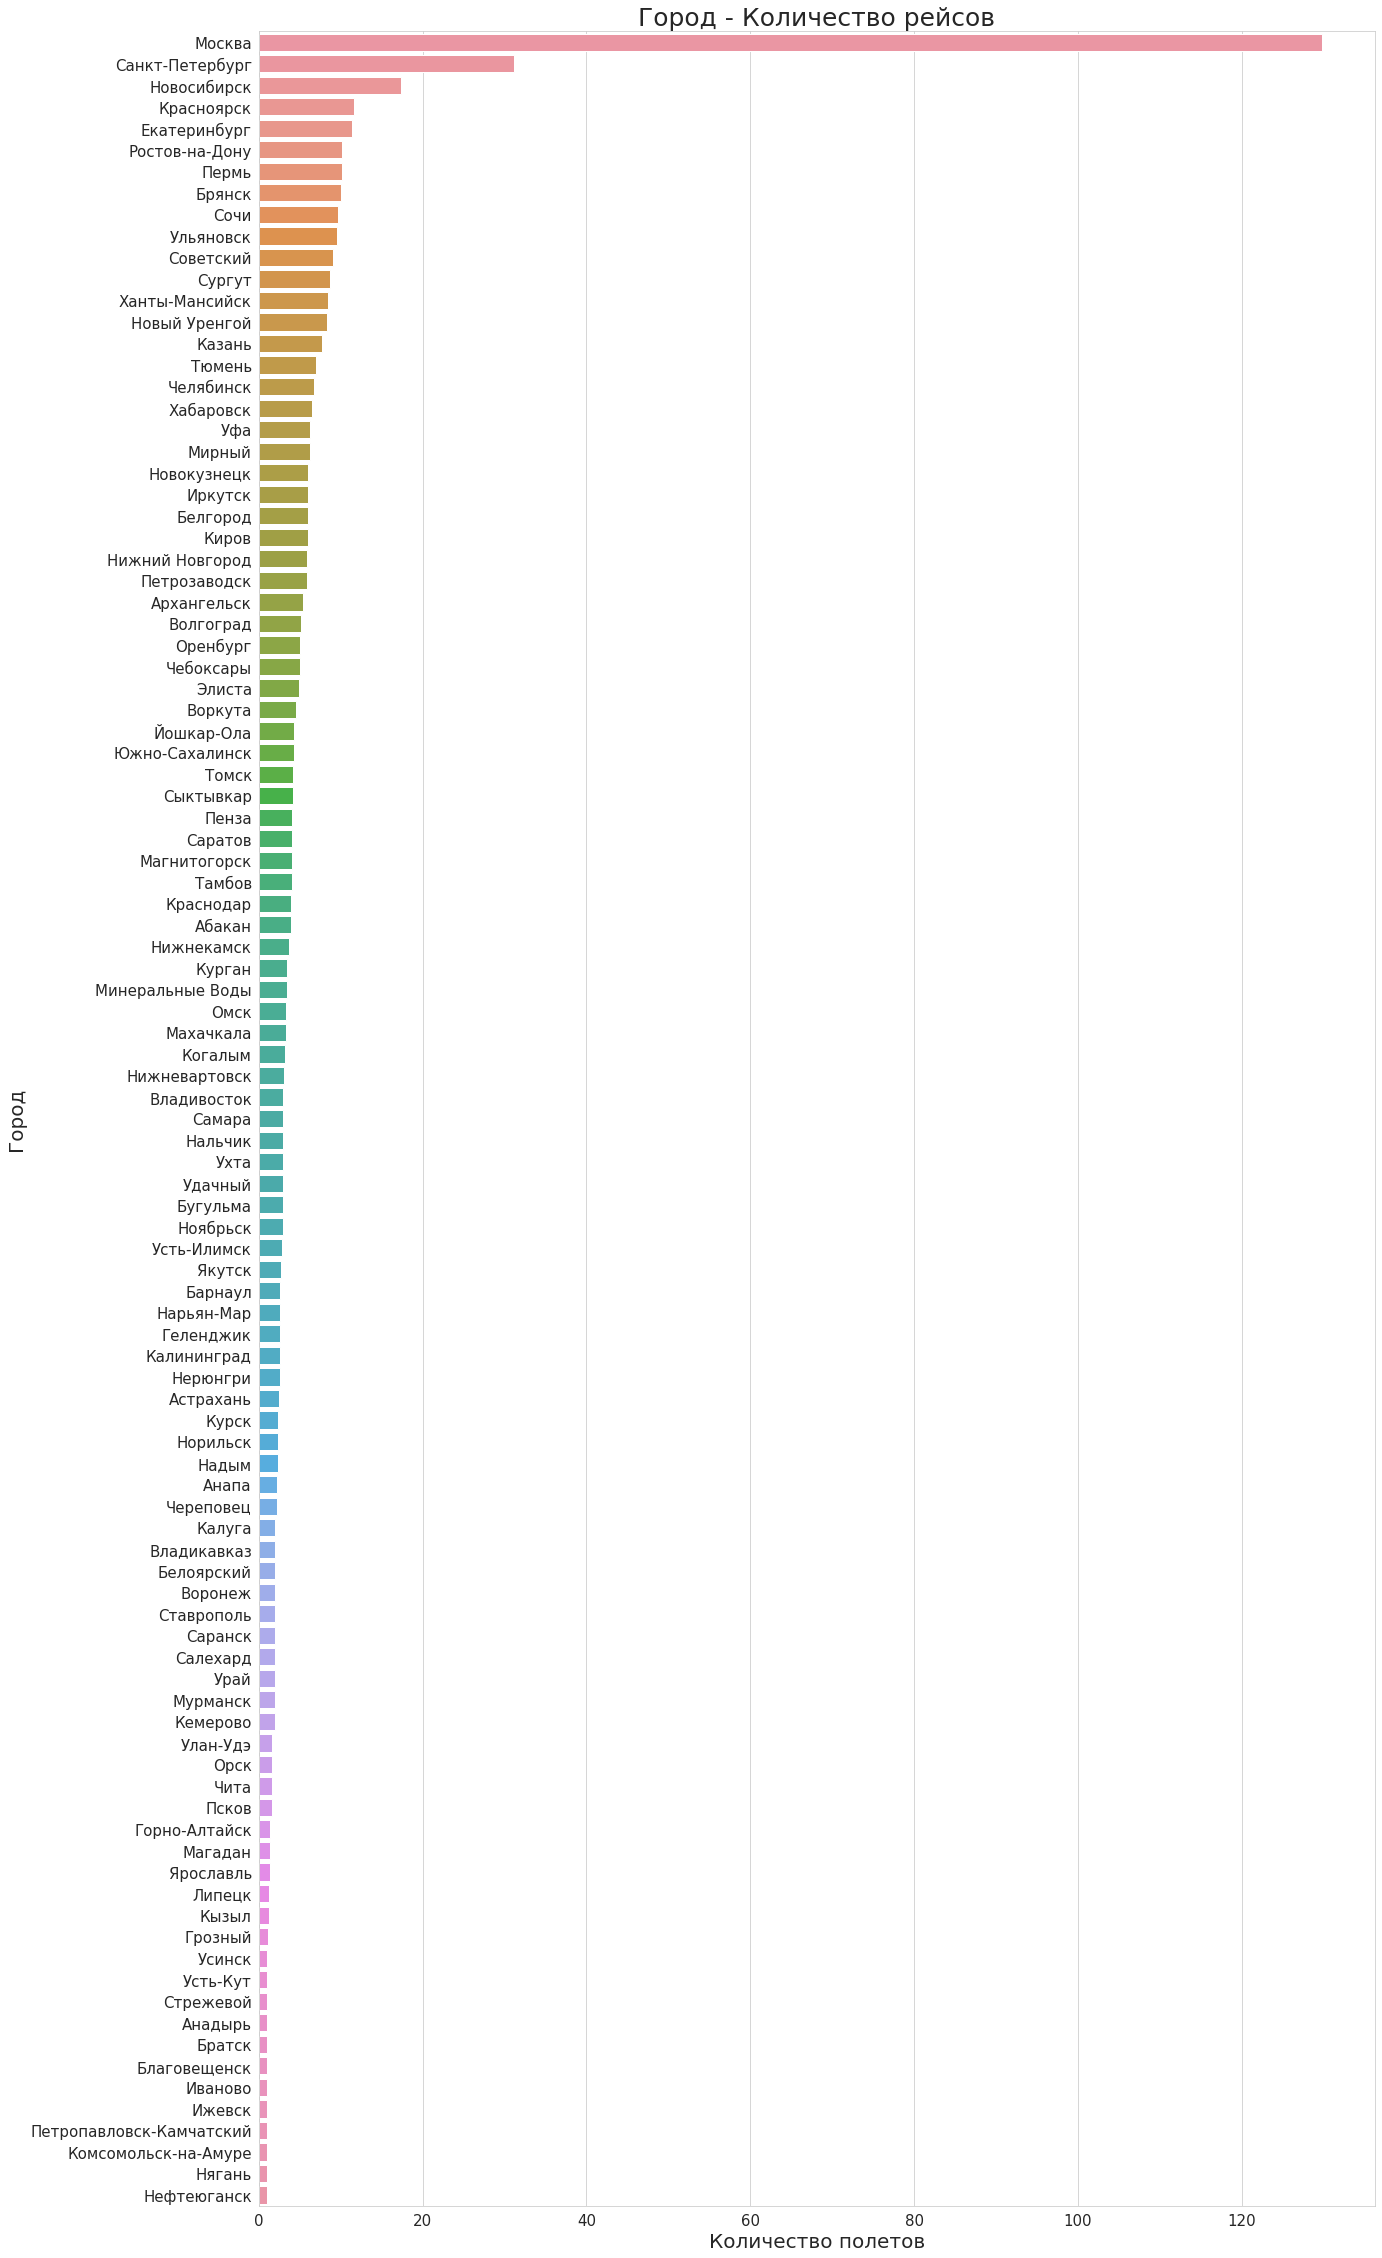

In [11]:
sns.set_style('whitegrid')
plt.figure(figsize = (20,40))

plt.title('Город - Количество рейсов', fontsize = 25)

sns.barplot(x = 'average_flights', y = 'city', data = q_3.sort_values(by = 'average_flights', ascending = False))

plt.xlabel('Количество полетов', fontsize = 20)
plt.ylabel('Город', fontsize = 20)

plt.xticks(rotation='horizontal', fontsize = 15)
plt.yticks(rotation='horizontal', fontsize = 15)

plt.show()

Этот график можно назвать довольно информативным, но он получился уж слишком громоздким. Не рассматривая топ-10 городов, где, как мы уже знаем, лидирует с огромным отрывом Москва, можно сказать, что в большинстве пунктах назначения количество рейсов не превышает и пяти.

#### Топ-10 городов по количеству рейсов

Визуализируем таблицу `q_3_top10`.

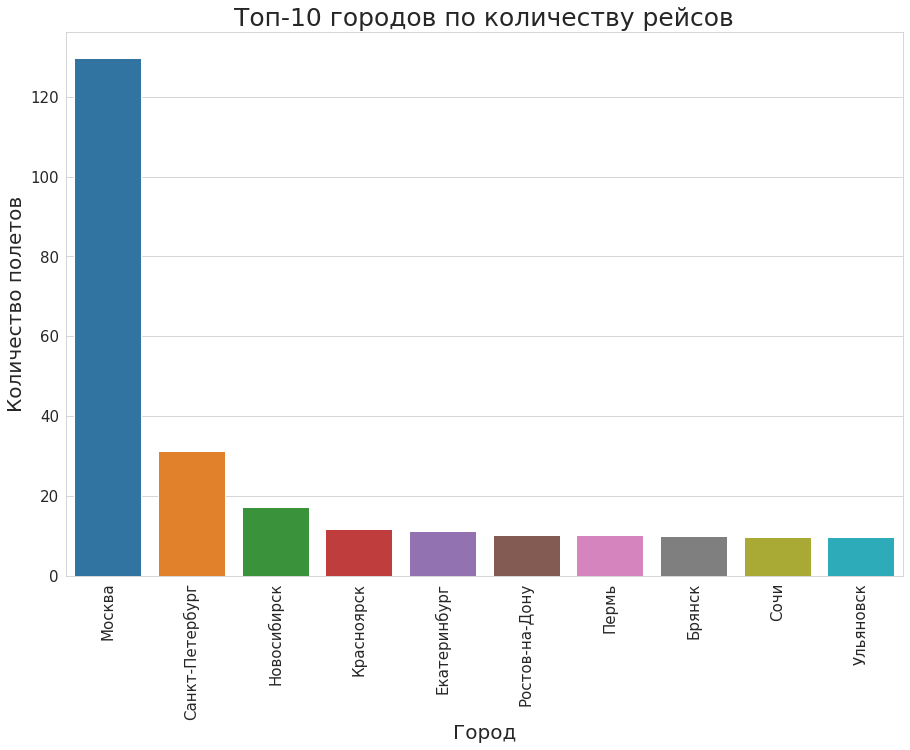

In [12]:
sns.set_style('whitegrid')
plt.figure(figsize = (15,10))

plt.title('Топ-10 городов по количеству рейсов', fontsize = 25)

sns.barplot(x = 'city', y = 'average_flights', data = q_3_top10)

plt.xlabel('Город', fontsize = 20)
plt.ylabel('Количество полетов', fontsize = 20)

plt.xticks(rotation='vertical', fontsize = 15)
plt.yticks(rotation='horizontal', fontsize = 15)

plt.show()

Топ-3 составляют три города: Москва, Санкт-Петербург, Новосибирск. Количество рейсов в остальных городах не превышает и десяти.

Есть догадка в том, что Новосибирск является одной из важных точек для перелетов, так как он находится практически по середине РФ и через аэропорты этого города осуществляются пересадки для полетов в восточную часть страны и за границу.

## Общий вывод

В ходе этого проекта были выполнены следующие шаги:
* парсинг сайта для получения таблицы `festivals`;
* проведен исследовательский анализ данных с помощью SQL;
* в ходе анализа был сделан вывод, что во время фестивалей спрос на авиабилеты практически не меняется;
* были получены файлы, в которых содержатся данные первого и третьего запросов, а именно:

    * таблица с информацией из первого запроса:
        * *model* — модели самолета;
        * *flights_amount* — количество рейсов для каждой модели самолетов *model* в сентябре 2018 года.

    * таблица с информацией из третьего запроса:
        * *city* — городах;
        * *average_flights* — среднем количестве рейсов, прибывающих в город *city* за день в августе 2018 года.
* в ходе работы с таблицами из запросов были сделаны следующие выводы:
    * большинство рейсов заканчиваются в Москве, причем с огромным отрывом в сравнении с другими городами;
    * топ-3 городов по количеству рейсов: Москва, Санкт-Петебург, Новосибирск;
    * наибольшее количество рейсов совершают модели самолетов, предназанченные для региональных перелетов.